# Private Residential Transactions EDA
A deep-dive exploratory data analysis (EDA) across all private residential transaction CSVs in `data/private`.

## 1. Setup Environment and Imports
Import core analysis libraries, configure plotting aesthetics, and define handy paths for the project.

In [9]:
from __future__ import annotations

from pathlib import Path
from typing import Iterable, Optional

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display

# Plotting and pandas configuration
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})
pd.set_option("display.max_columns", 60)
pd.set_option("display.float_format", lambda v: f"{v:,.2f}")

# Project paths
REPO_ROOT = Path.cwd().resolve()

REPO_ROOT

PosixPath('/Users/aatmiya/Documents/GitHub/COMP3522-Singapore')

In [11]:
DATA_DIR = REPO_ROOT / "data" / "private"
OUTPUT_DIR = REPO_ROOT / "analysis" / "outputs" / "private"
PLOTS_DIR = OUTPUT_DIR / "plots"
COMBINED_PATH = REPO_ROOT / "data" / "private_combined.csv"

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print(f"Repository root: {REPO_ROOT}")
print(f"Data directory: {DATA_DIR}")
print(f"Output directory: {OUTPUT_DIR}")

Repository root: /Users/aatmiya/Documents/GitHub/COMP3522-Singapore
Data directory: /Users/aatmiya/Documents/GitHub/COMP3522-Singapore/data/private
Output directory: /Users/aatmiya/Documents/GitHub/COMP3522-Singapore/analysis/outputs/private


## 2. Load and Combine CSV Files from `data/private`
Discover all CSVs, ensure schema alignment, and concatenate them into a unified DataFrame.

In [14]:
csv_files = sorted(DATA_DIR.glob("*.csv"))
if not csv_files:
    raise FileNotFoundError(f"No CSV files found inside {DATA_DIR}")

print(f"Discovered {len(csv_files)} CSV files:")
for path in csv_files:
    print(f" • {path.name}")

raw_frames: list[pd.DataFrame] = []
schemas: dict[str, list[str]] = {}

for csv_path in csv_files:
    df = pd.read_csv(csv_path, dtype=str, encoding="latin1")
    raw_frames.append(df)

combined_df = pd.concat(raw_frames, ignore_index=True)
print(f"Combined dataframe shape: {combined_df.shape}")
combined_df.head()

Discovered 25 CSV files:
 • 1-5-1.csv
 • 1-5-2.csv
 • 1-5-3-1.csv
 • 1-5-3-2.csv
 • 11-15-1.csv
 • 11-15-2.csv
 • 11-15-3-1.csv
 • 11-15-3-2.csv
 • 11-15-3-3.csv
 • 16-20-1.csv
 • 16-20-2.csv
 • 16-20-3-1.csv
 • 16-20-3-2.csv
 • 16-20-3-3.csv
 • 16-20-4.csv
 • 20-28-1.csv
 • 20-28-2.csv
 • 20-28-3-1.csv
 • 20-28-3-2.csv
 • 20-28-3-3.csv
 • 20-28-4.csv
 • 6-10-1.csv
 • 6-10-2.csv
 • 6-10-3-1.csv
 • 6-10-3-2.csv
Combined dataframe shape: (139317, 17)


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
0,HARBOUR RESIDENCES,"6,340,000","2,185.09","2,901",Sep-25,PASIR PANJANG ROAD,New Sale,Land,203,"31,232",-,Terrace House,1,Freehold,05,Rest of Central Region,-
1,LANDED HOUSING DEVELOPMENT,"15,200,000","7,812.51","1,946",Sep-25,OCEAN DRIVE,Resale,Land,725.8,"20,942",-,Detached House,1,99 yrs lease commencing from 2004,04,Core Central Region,-
2,BLAIR PLAIN CONSERVATION AREA,"5,900,000","2,037.63","2,896",Sep-25,BLAIR ROAD,Resale,Land,189.3,"31,167",-,Terrace House,1,Freehold,02,Rest of Central Region,-
3,HARBOUR RESIDENCES,"5,630,000","1,983.81","2,838",Sep-25,PASIR PANJANG ROAD,New Sale,Land,184.3,"30,548",-,Terrace House,1,Freehold,05,Rest of Central Region,-
4,HARBOUR RESIDENCES,"5,928,000","2,046.24","2,897",Sep-25,PASIR PANJANG ROAD,New Sale,Land,190.1,"31,184",-,Terrace House,1,Freehold,05,Rest of Central Region,-


## 3. Persist Combined Dataset Snapshot
Save the unified dataset for later reuse and quick reproducibility checks.

In [16]:
combined_df.to_csv(COMBINED_PATH, index=False)
parquet_path = OUTPUT_DIR / "private_combined.parquet"
combined_df.to_parquet(parquet_path, index=False)

print(f"CSV snapshot saved to: {COMBINED_PATH.relative_to(REPO_ROOT)}")
print(f"Parquet snapshot saved to: {parquet_path.relative_to(REPO_ROOT)}")

CSV snapshot saved to: data/private_combined.csv
Parquet snapshot saved to: analysis/outputs/private/private_combined.parquet


## 4. Inspect Combined DataFrame Structure
Peek at the head, tail, sample rows, and structural metadata to validate load quality.

In [17]:
print(f"DataFrame shape: {combined_df.shape[0]:,} rows × {combined_df.shape[1]} columns")
display(combined_df.head(3))
display(combined_df.tail(3))
display(combined_df.sample(3, random_state=42))

DataFrame shape: 139,317 rows × 17 columns


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
0,HARBOUR RESIDENCES,"6,340,000","2,185.09","2,901",Sep-25,PASIR PANJANG ROAD,New Sale,Land,203,"31,232",-,Terrace House,1,Freehold,05,Rest of Central Region,-
1,LANDED HOUSING DEVELOPMENT,"15,200,000","7,812.51","1,946",Sep-25,OCEAN DRIVE,Resale,Land,725.8,"20,942",-,Detached House,1,99 yrs lease commencing from 2004,04,Core Central Region,-
2,BLAIR PLAIN CONSERVATION AREA,"5,900,000","2,037.63","2,896",Sep-25,BLAIR ROAD,Resale,Land,189.3,"31,167",-,Terrace House,1,Freehold,02,Rest of Central Region,-


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
139314,KOPAR AT NEWTON,"1,537,000",688.9,"2,231",Sep-20,MAKEWAY AVENUE,New Sale,Strata,64,"24,016",-,Apartment,1,99 yrs lease commencing from 2019,09,Core Central Region,06 to 10
139315,JERVOIS LODGE,"1,750,000","1,388.56","1,260",Sep-20,JERVOIS ROAD,Resale,Strata,129,"13,566",-,Condominium,1,Freehold,10,Core Central Region,01 to 05
139316,STARLIGHT SUITES,"3,850,000","1,862.17","2,067",Sep-20,RIVER VALLEY CLOSE,Resale,Strata,173,"22,254",-,Apartment,1,Freehold,09,Core Central Region,06 to 10


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
54732,BARTLEY VUE,"2,148,000","1,044.11","2,057",Nov-24,JALAN BUNGA RAMPAI,New Sale,Strata,97,"22,144",-,Apartment,1,99 yrs lease commencing from 2020,19,Rest of Central Region,01 to 05
27986,AALTO,"5,200,000","1,959.05","2,654",Aug-24,MEYER ROAD,Resale,Strata,182,"28,571",-,Condominium,1,Freehold,15,Rest of Central Region,16 to 20
129862,RIVERGATE,"4,800,000","1,550.02","3,097",Nov-22,ROBERTSON QUAY,Resale,Strata,144,"33,333",-,Apartment,1,Freehold,09,Core Central Region,36 to 40


In [18]:
combined_df.info()

dtypes_overview = combined_df.dtypes.rename("dtype").to_frame()
display(dtypes_overview)

nunique_series = combined_df.nunique(dropna=False).sort_values(ascending=False)
display(nunique_series.to_frame(name="unique_values"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139317 entries, 0 to 139316
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Project Name          139317 non-null  object
 1   Transacted Price ($)  139317 non-null  object
 2   Area (SQFT)           139317 non-null  object
 3   Unit Price ($ PSF)    139317 non-null  object
 4   Sale Date             139317 non-null  object
 5   Street Name           139317 non-null  object
 6   Type of Sale          139317 non-null  object
 7   Type of Area          139317 non-null  object
 8   Area (SQM)            139317 non-null  object
 9   Unit Price ($ PSM)    139317 non-null  object
 10  Nett Price($)         139317 non-null  object
 11  Property Type         139317 non-null  object
 12  Number of Units       139317 non-null  object
 13  Tenure                139317 non-null  object
 14  Postal District       139317 non-null  object
 15  Market Segment   

,dtype
Project Name,object
Transacted Price ($),object
Area (SQFT),object
Unit Price ($ PSF),object
Sale Date,object
Street Name,object
Type of Sale,object
Type of Area,object
Area (SQM),object
Unit Price ($ PSM),object


,unique_values
Unit Price ($ PSM),26568
Transacted Price ($),17986
Area (SQM),4074
Area (SQFT),4074
Unit Price ($ PSF),3562
Project Name,3021
Street Name,2069
Nett Price($),242
Tenure,139
Sale Date,61


## 5. Data Type Adjustments and Parsing
Normalize numeric fields, parse dates, and derive helper columns for downstream analysis.

In [20]:
def to_numeric(series: pd.Series) -> pd.Series:
    cleaned = (
        series.astype(str)
        .str.strip()
        .str.replace(",", "", regex=False)
        .str.replace("$", "", regex=False)
        .replace({"-": pd.NA, "": pd.NA, "nan": pd.NA, "None": pd.NA})
    )
    return pd.to_numeric(cleaned, errors="coerce")

cleaned_df = combined_df.copy()

numeric_columns: Iterable[str] = (
    "Transacted Price ($)",
    "Area (SQFT)",
    "Unit Price ($ PSF)",
    "Area (SQM)",
    "Unit Price ($ PSM)",
    "Nett Price($)",
    "Number of Units",
    "Postal District",
)

for column in numeric_columns:
    if column in cleaned_df.columns:
        cleaned_df[column] = to_numeric(cleaned_df[column])

if "Sale Date" in cleaned_df.columns:
    cleaned_df["Sale Date"] = pd.to_datetime(cleaned_df["Sale Date"], format="%b-%y", errors="coerce")
    cleaned_df["Sale Year"] = cleaned_df["Sale Date"].dt.year
    cleaned_df["Sale Month"] = cleaned_df["Sale Date"].dt.month
    cleaned_df["Sale Quarter"] = cleaned_df["Sale Date"].dt.to_period("Q")

categorical_candidates = [
    "Property Type",
    "Type of Sale",
    "Type of Area",
    "Tenure",
    "Market Segment",
    "Floor Level",
    "Street Name",
    "Project Name",
    "_source_file",
]
for column in categorical_candidates:
    if column in cleaned_df.columns:
        cleaned_df[column] = cleaned_df[column].astype("category")

print("Converted DataFrame dtypes (top 10):")
display(cleaned_df.dtypes.head(10))

cleaned_df.head()

Converted DataFrame dtypes (top 10):


Project Name                  category
Transacted Price ($)             int64
Area (SQFT)                    float64
Unit Price ($ PSF)               int64
Sale Date               datetime64[ns]
Street Name                   category
Type of Sale                  category
Type of Area                  category
Area (SQM)                     float64
Unit Price ($ PSM)               int64
dtype: object

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level,Sale Year,Sale Month,Sale Quarter
0,HARBOUR RESIDENCES,6340000,"2,185.09",2901,2025-09-01,PASIR PANJANG ROAD,New Sale,Land,203.00,31232,NaN,Terrace House,1,Freehold,5,Rest of Central Region,-,2025,9,2025Q3
1,LANDED HOUSING DEVELOPMENT,15200000,"7,812.51",1946,2025-09-01,OCEAN DRIVE,Resale,Land,725.80,20942,NaN,Detached House,1,99 yrs lease commencing from 2004,4,Core Central Region,-,2025,9,2025Q3
2,BLAIR PLAIN CONSERVATION AREA,5900000,"2,037.63",2896,2025-09-01,BLAIR ROAD,Resale,Land,189.30,31167,NaN,Terrace House,1,Freehold,2,Rest of Central Region,-,2025,9,2025Q3
3,HARBOUR RESIDENCES,5630000,"1,983.81",2838,2025-09-01,PASIR PANJANG ROAD,New Sale,Land,184.30,30548,NaN,Terrace House,1,Freehold,5,Rest of Central Region,-,2025,9,2025Q3
4,HARBOUR RESIDENCES,5928000,"2,046.24",2897,2025-09-01,PASIR PANJANG ROAD,New Sale,Land,190.10,31184,NaN,Terrace House,1,Freehold,5,Rest of Central Region,-,2025,9,2025Q3


## 6. Core Descriptive Statistics
Summarize central tendencies, dispersion, and distribution shape for key numeric measures.

In [21]:
numeric_df = cleaned_df.select_dtypes(include=[np.number])
print(f"Numeric feature count: {numeric_df.shape[1]}")

descriptive_stats = numeric_df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
display(descriptive_stats.round(2))

moments = numeric_df.agg(["mean", "median", "std", "var", "skew", "kurt"]).T
display(moments.round(3))

top_property_types = (
    cleaned_df["Property Type"].value_counts().rename_axis("Property Type").to_frame("count").head(10)
    if "Property Type" in cleaned_df.columns
    else pd.DataFrame()
)
if not top_property_types.empty:
    display(top_property_types)

Numeric feature count: 10


,count,mean,std,min,5%,25%,50%,75%,95%,max
Transacted Price ($),"139,317.00","2,139,910.07","4,620,993.30","320,000.00","810,000.00","1,228,888.00","1,623,800.00","2,320,000.00","4,700,000.00","890,000,000.00"
Area (SQFT),"139,317.00","1,258.35","2,421.59",258.34,484.38,731.95,"1,011.82","1,323.97","2,841.70","619,834.18"
Unit Price ($ PSF),"139,317.00","1,767.40",610.66,120.00,929.00,"1,304.00","1,680.00","2,167.00","2,869.00","6,593.00"
Area (SQM),"139,317.00",116.90,224.97,24.00,45.00,68.00,94.00,123.00,264.00,"57,584.00"
Unit Price ($ PSM),"139,317.00","19,024.29","6,573.14","1,288.00","10,000.00","14,035.00","18,089.00","23,327.00","30,881.00","70,964.00"
Nett Price($),246.00,"2,304,598.70","2,210,019.50","802,286.00","849,335.50","1,272,032.00","1,799,300.00","2,330,300.00","4,632,675.00","14,463,000.00"
Number of Units,"139,317.00",1.01,1.39,1.00,1.00,1.00,1.00,1.00,1.00,446.00
Postal District,"139,317.00",15.80,7.04,1.00,3.00,10.00,17.00,21.00,27.00,28.00
Sale Year,"139,317.00","2,022.62",1.55,"2,020.00","2,020.00","2,021.00","2,022.00","2,024.00","2,025.00","2,025.00"
Sale Month,"139,317.00",6.53,3.39,1.00,1.00,4.00,7.00,9.00,12.00,12.00


,mean,median,std,var,skew,kurt
Transacted Price ($),"2,139,910.07","1,623,800.00","4,620,993.30","21,353,579,107,868.17",116.28,"19,023.75"
Area (SQFT),"1,258.35","1,011.82","2,421.59","5,864,107.58",145.76,"32,752.72"
Unit Price ($ PSF),"1,767.40","1,680.00",610.66,"372,905.07",0.70,0.64
Area (SQM),116.90,94.00,224.97,"50,612.12",145.76,"32,752.72"
Unit Price ($ PSM),"19,024.29","18,089.00","6,573.14","43,206,199.81",0.70,0.64
Nett Price($),"2,304,598.69","1,799,300.00","2,210,019.50","4,884,186,208,796.72",4.01,17.56
Number of Units,1.01,1.00,1.39,1.94,254.92,"76,453.11"
Postal District,15.80,17.00,7.04,49.59,-0.25,-0.79
Sale Year,"2,022.62","2,022.00",1.55,2.42,0.13,-1.25
Sale Month,6.53,7.00,3.39,11.49,-0.01,-1.19


,count
Property Type,
Condominium,56809
Apartment,53728
Executive Condominium,17202
Terrace House,6675
Semi-Detached House,3500
Detached House,1403


## 7. Missing Data Profiling
Quantify missingness per column and visualize global patterns to focus data-quality efforts.

,missing_count,missing_pct
Nett Price($),139071,99.82
Transacted Price ($),0,0.00
Sale Month,0,0.00
Sale Year,0,0.00
Floor Level,0,0.00
Market Segment,0,0.00
Postal District,0,0.00
Tenure,0,0.00
Number of Units,0,0.00
Property Type,0,0.00


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/2511622895.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


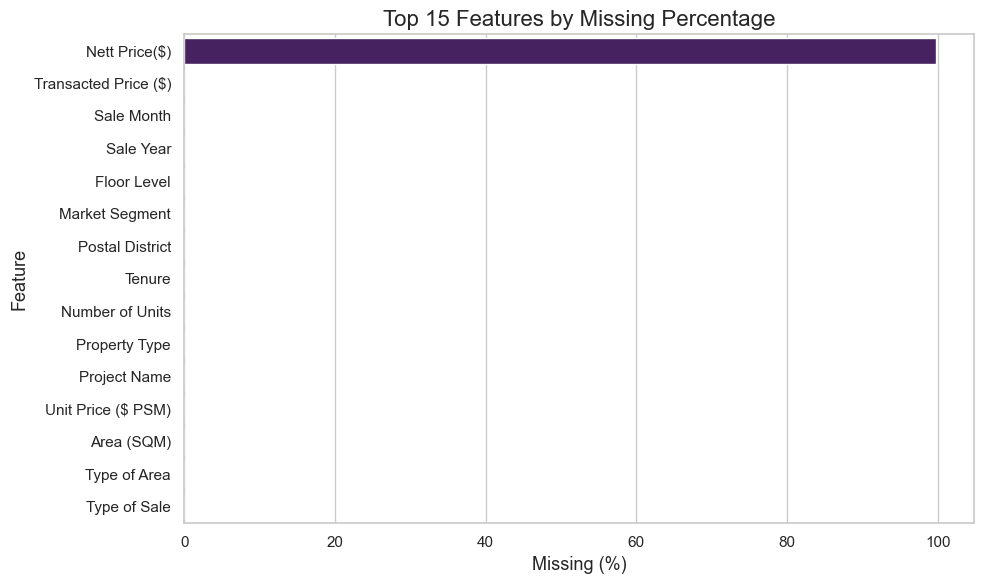

In [23]:
missing_summary = (
    cleaned_df.isna()
    .sum()
    .to_frame(name="missing_count")
    .assign(missing_pct=lambda df_: (df_["missing_count"] / len(cleaned_df) * 100))
    .sort_values("missing_pct", ascending=False)
    .round({"missing_pct": 2})
)
display(missing_summary)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=missing_summary.reset_index().head(15),
    x="missing_pct",
    y="index",
    palette="viridis"
)
plt.title("Top 15 Features by Missing Percentage")
plt.xlabel("Missing (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "missingness_top15.png", dpi=300)
plt.show()

## 8. Univariate Distributions for Numeric Features
Visualize how individual numeric variables are distributed and identify skew/outliers.

,mean,median,std,skew,kurt
Transacted Price ($),"2,139,910.07","1,623,800.00","4,620,993.30",116.28,"19,023.75"
Area (SQFT),"1,258.35","1,011.82","2,421.59",145.76,"32,752.72"
Unit Price ($ PSF),"1,767.40","1,680.00",610.66,0.70,0.64
Area (SQM),116.90,94.00,224.97,145.76,"32,752.72"
Unit Price ($ PSM),"19,024.29","18,089.00","6,573.14",0.70,0.64
Nett Price($),"2,304,598.69","1,799,300.00","2,210,019.50",4.01,17.56
Number of Units,1.01,1.00,1.39,254.92,"76,453.11"
Postal District,15.80,17.00,7.04,-0.25,-0.79
Sale Year,"2,022.62","2,022.00",1.55,0.13,-1.25
Sale Month,6.53,7.00,3.39,-0.01,-1.19


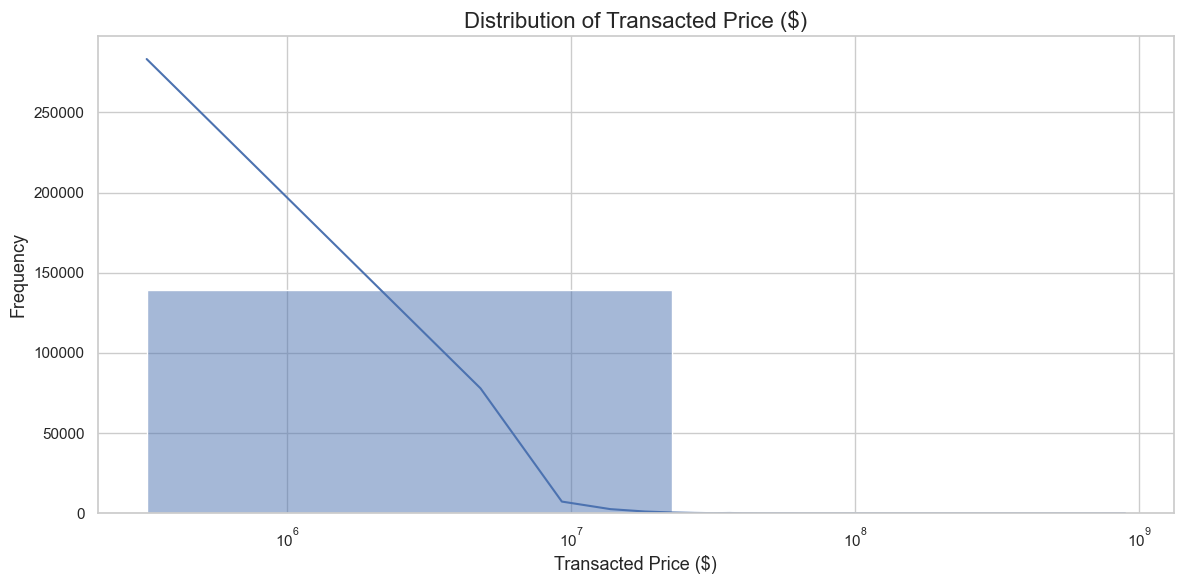

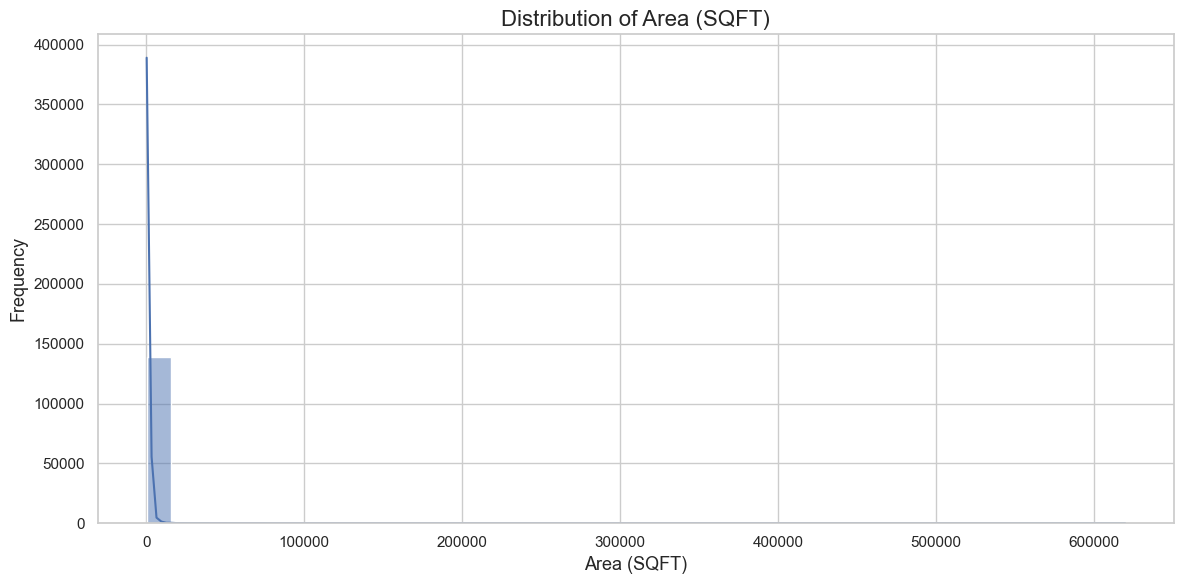

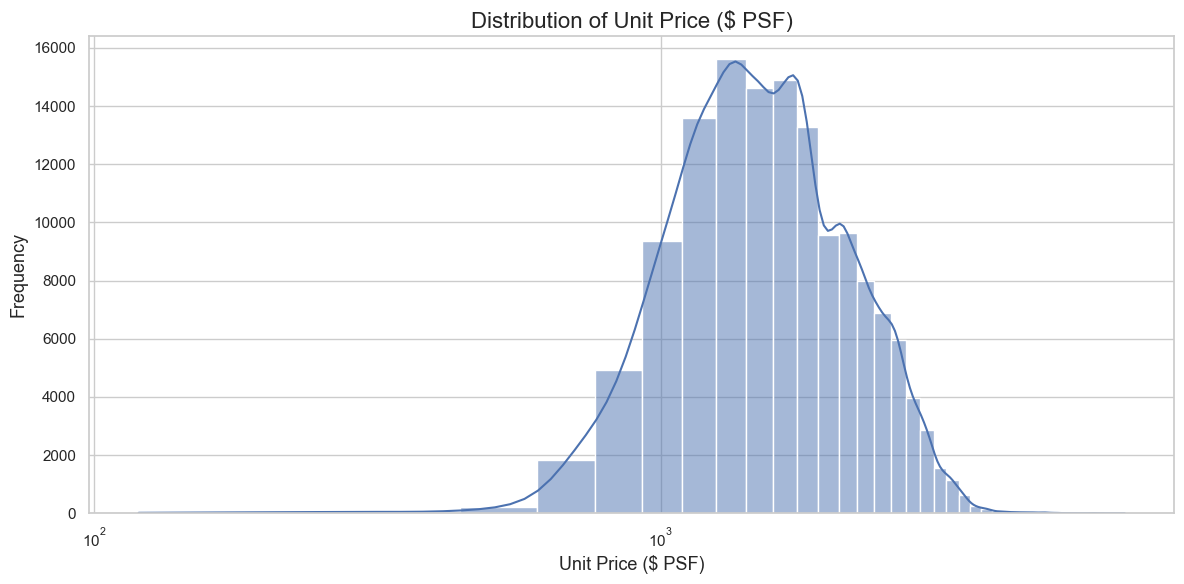

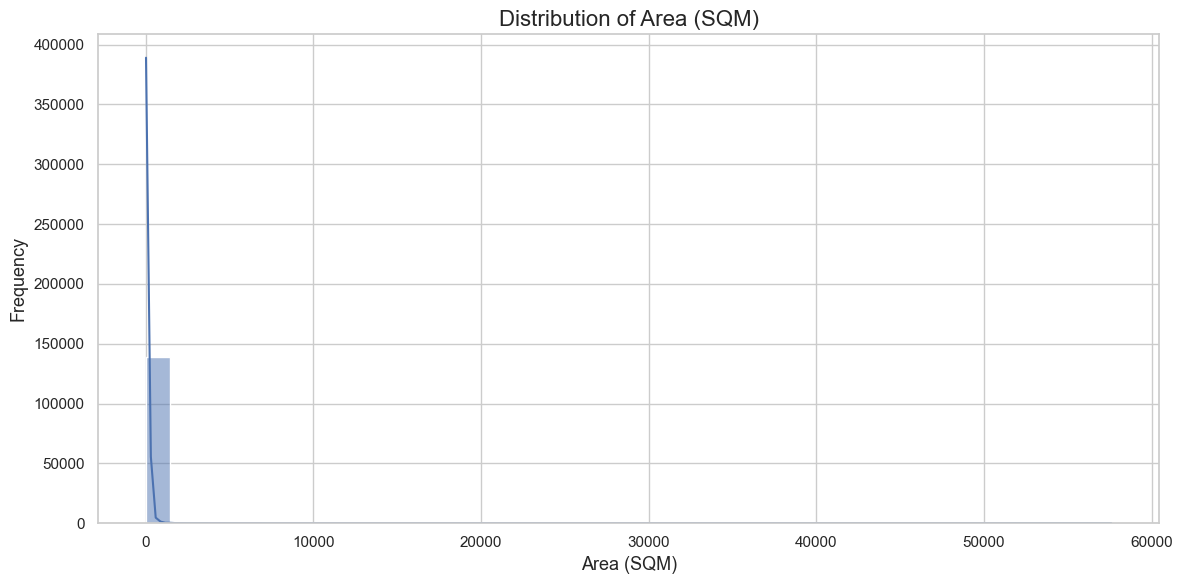

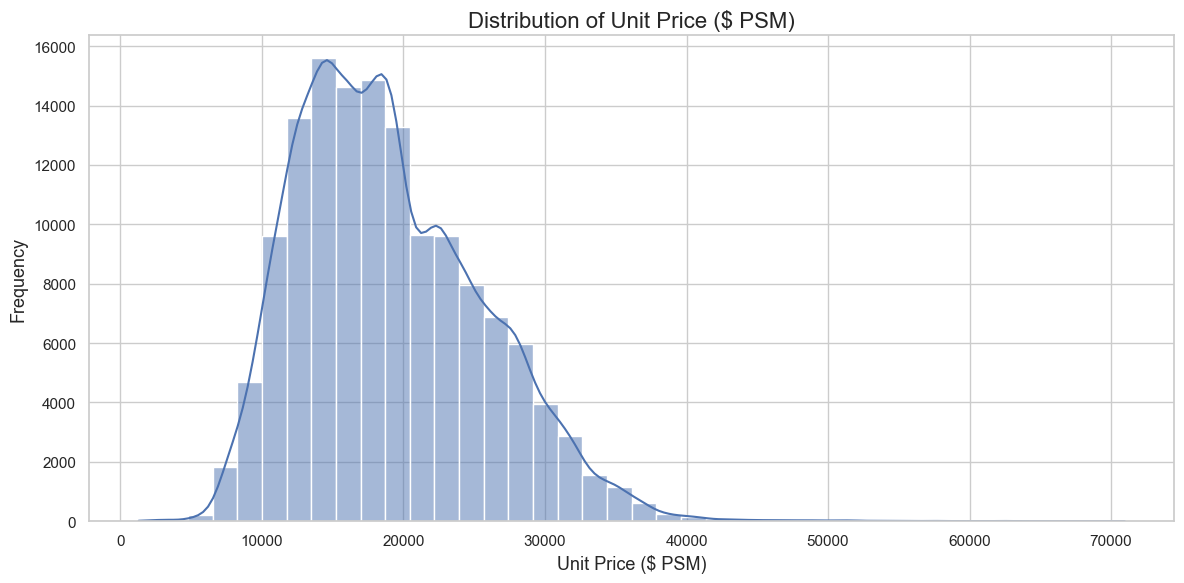

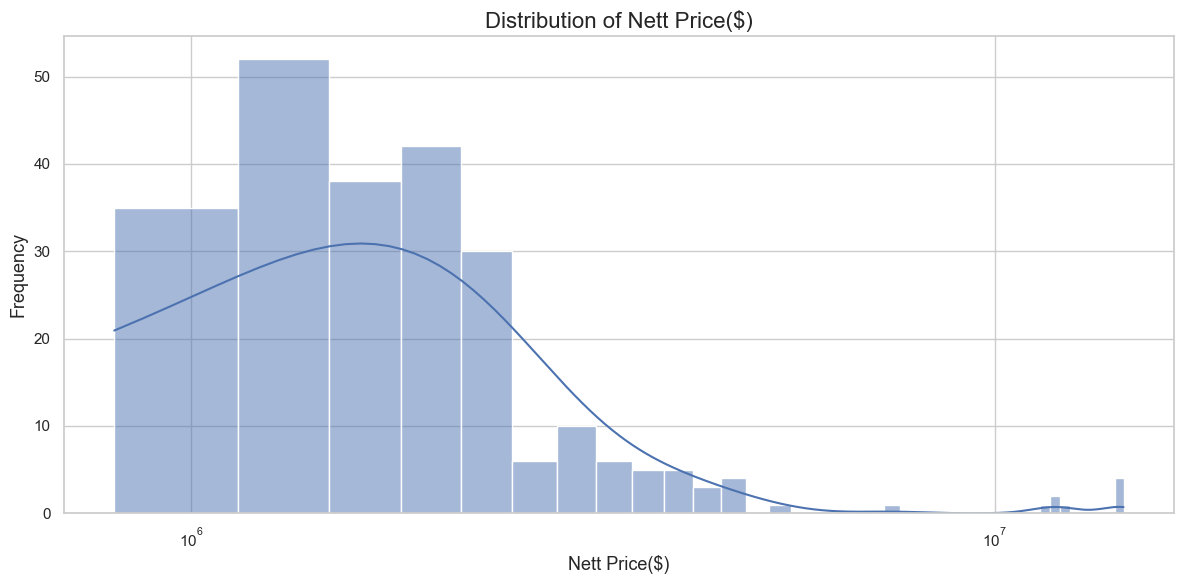

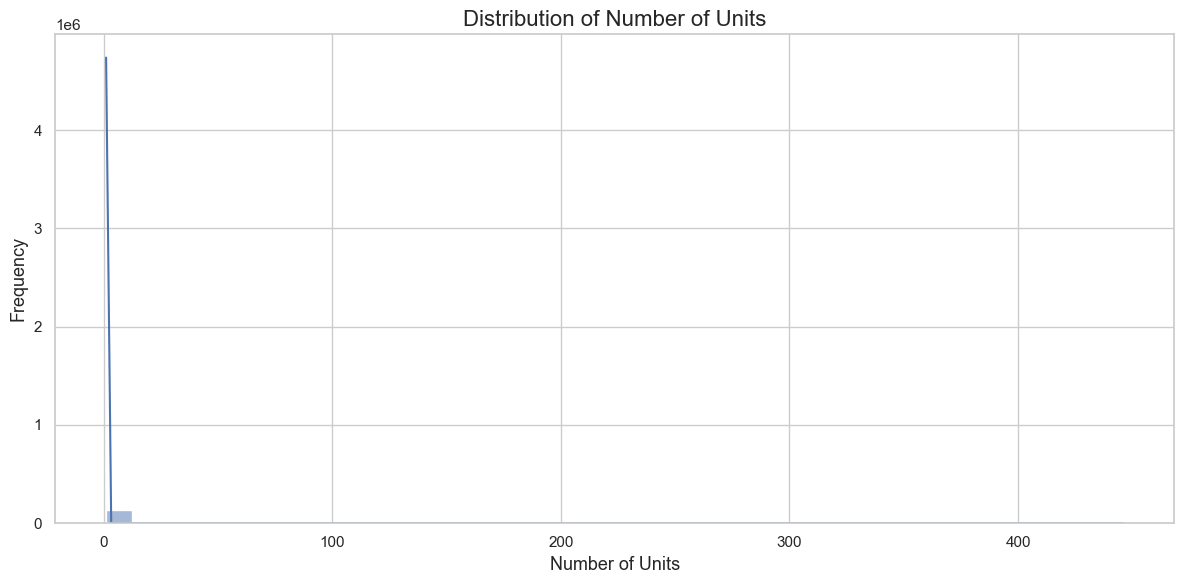

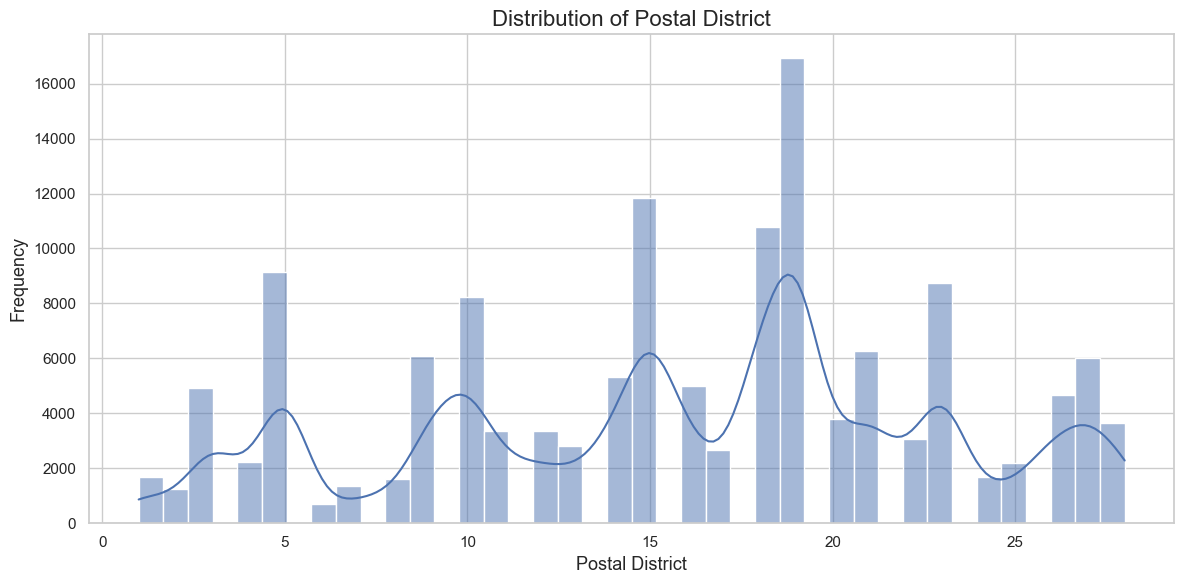

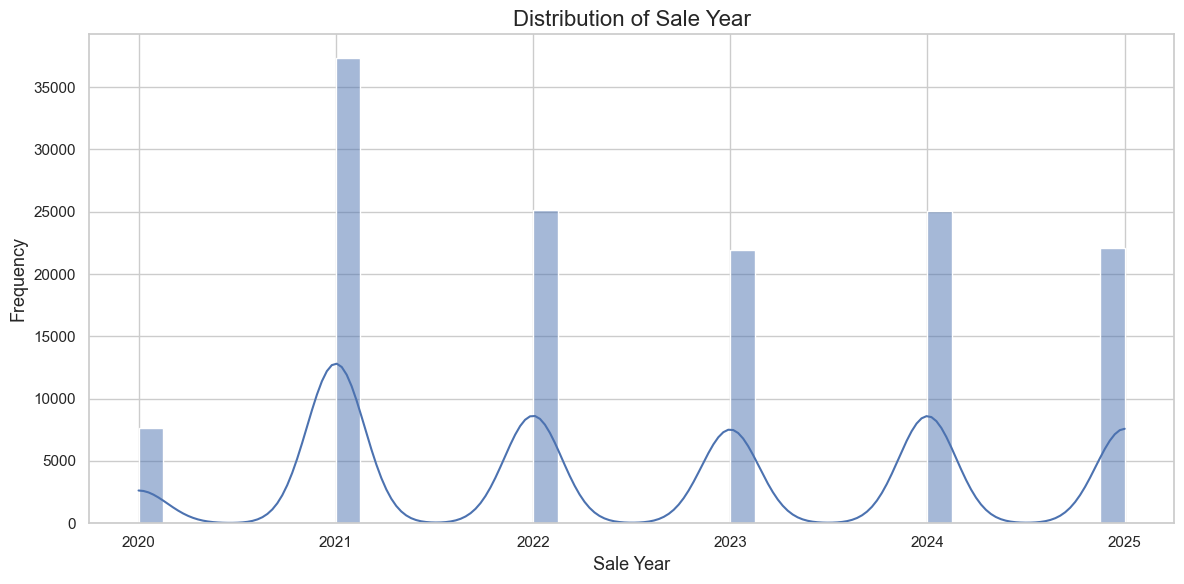

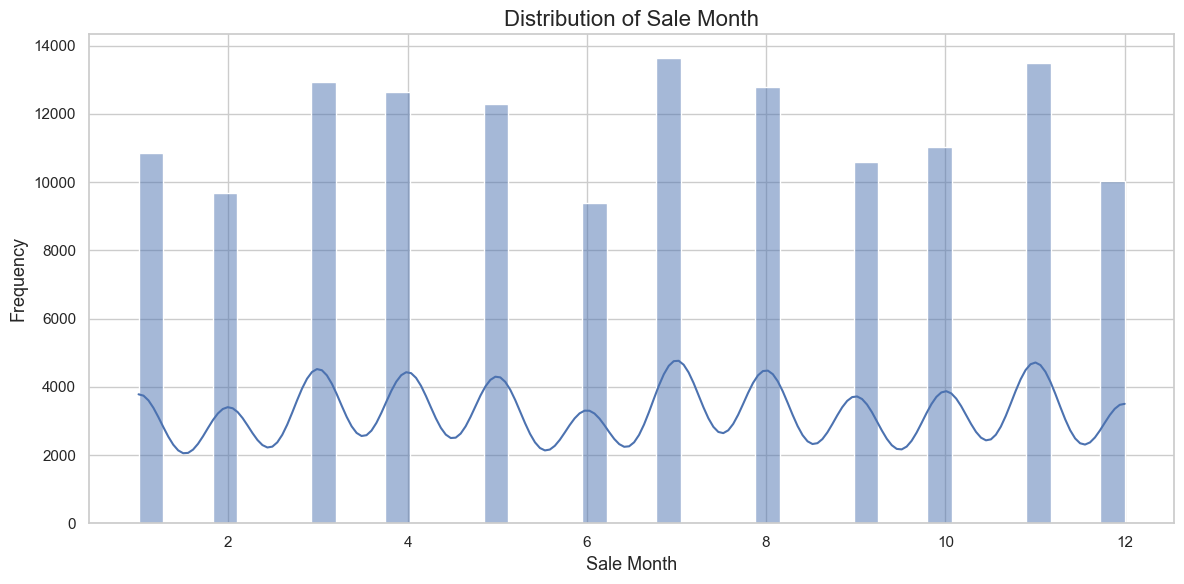

In [24]:
distribution_stats = numeric_df.agg(["mean", "median", "std", "skew", "kurt"]).T.round(3)
display(distribution_stats)

log_scale_columns = {"Transacted Price ($)", "Unit Price ($ PSF)", "Nett Price($)"}

for column in numeric_df.columns:
    series = numeric_df[column].dropna()
    if series.empty:
        continue
    plt.figure()
    sns.histplot(series, kde=True, bins=40)
    if column in log_scale_columns:
        plt.xscale("log")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    filename = column.lower().replace(" ", "_").replace("($)", "").replace("/", "_per_")
    plt.savefig(PLOTS_DIR / f"distribution_{filename}.png", dpi=300)
    plt.show()

## 9. Categorical Feature Frequency Analysis
Identify the most common categories and detect long-tail behaviour across key dimensions.

,count
Property Type,
Condominium,56809
Apartment,53728
Executive Condominium,17202
Terrace House,6675
Semi-Detached House,3500
Detached House,1403


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


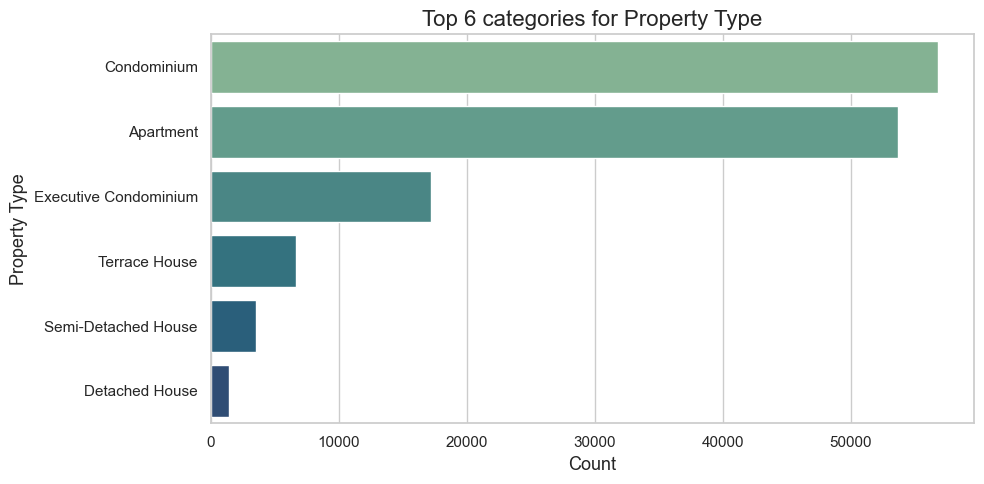

,count
Type of Sale,
Resale,85170
New Sale,49585
Sub Sale,4562


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


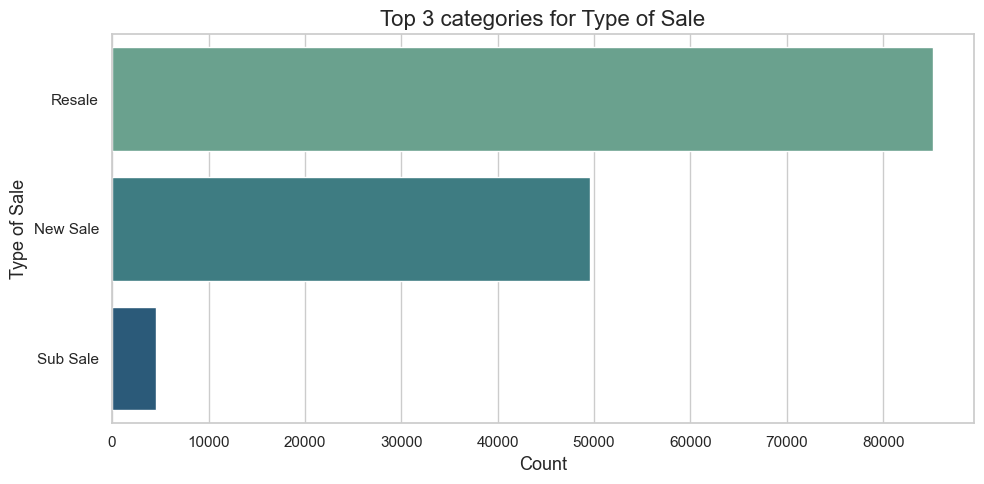

,count
Type of Area,
Strata,129516
Land,9801


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


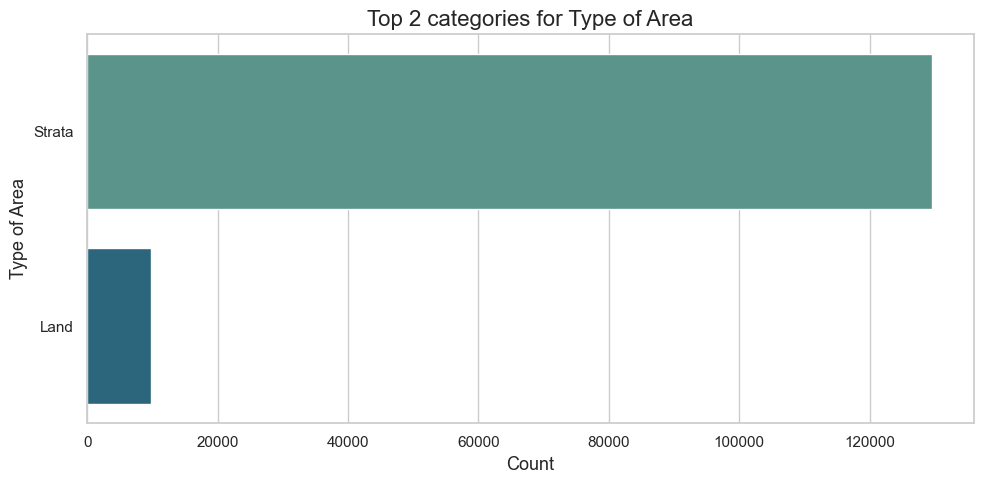

,count
Tenure,
Freehold,37282
99 yrs lease commencing from 2018,10446
99 yrs lease commencing from 2019,7125
99 yrs lease commencing from 2021,6220
99 yrs lease commencing from 2024,6122
99 yrs lease commencing from 2012,6045
99 yrs lease commencing from 2023,6006
99 yrs lease commencing from 2011,5836
99 yrs lease commencing from 2022,5029


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


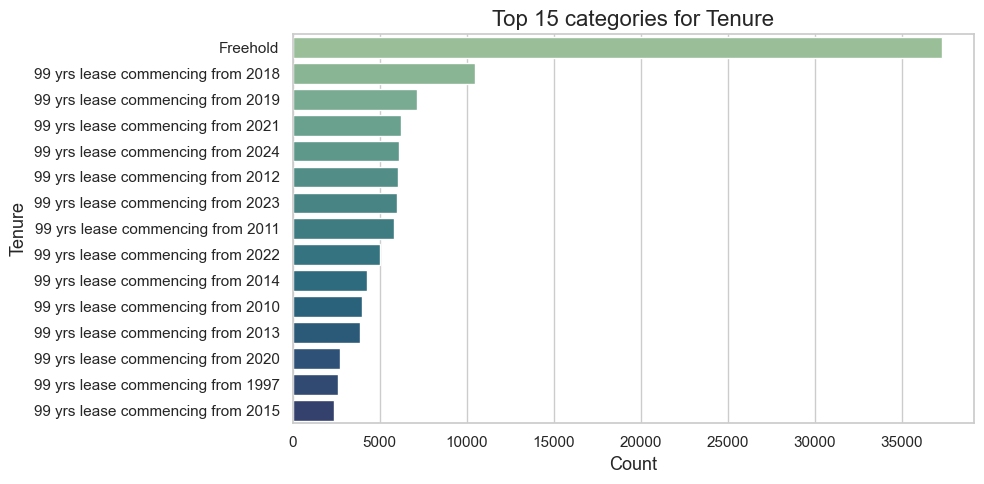

,count
Market Segment,
Outside Central Region,77493
Rest of Central Region,40682
Core Central Region,21142


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


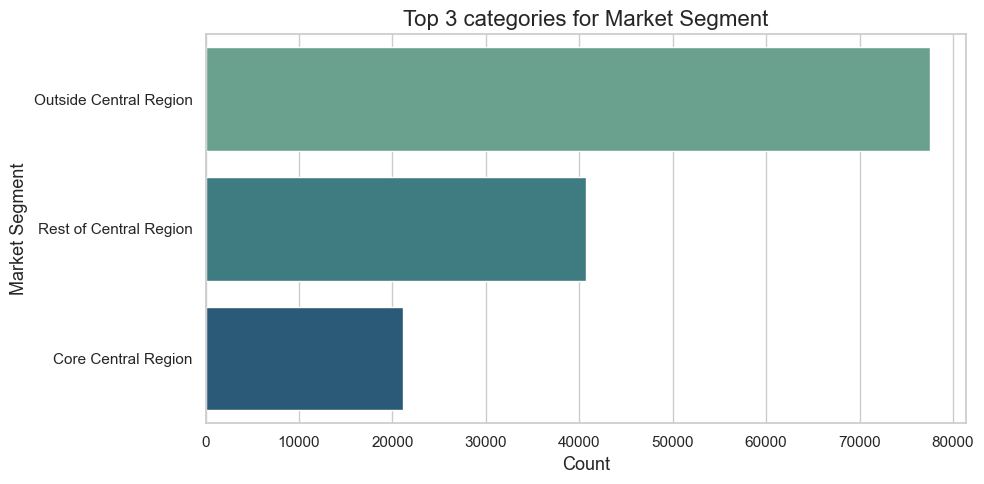

,count
Floor Level,
01 to 05,46457
06 to 10,33131
11 to 15,23215
16 to 20,11841
-,11546
21 to 25,6003
26 to 30,3234
31 to 35,1955
36 to 40,1030


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


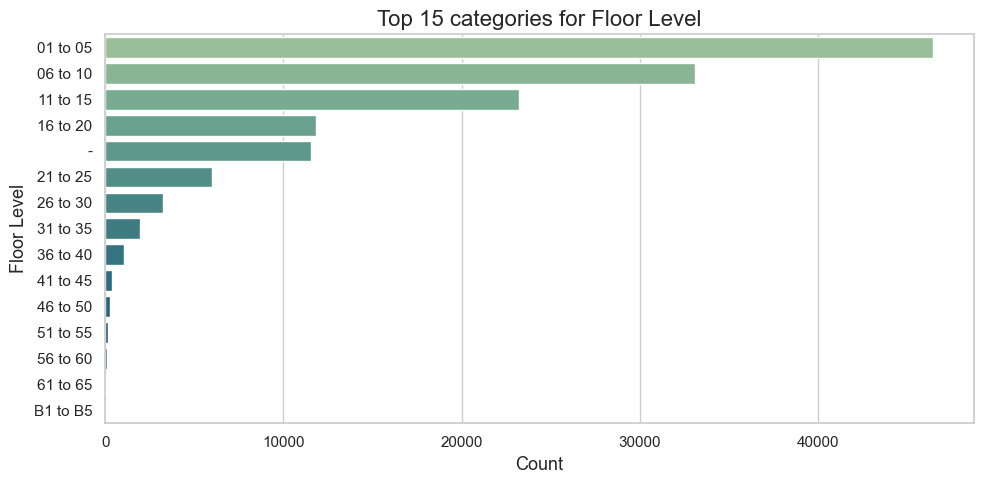

,count
Street Name,
TAMPINES STREET 62,2467
NORMANTON PARK,2010
CANBERRA DRIVE,1855
TAMPINES STREET 86,1538
LENTOR CENTRAL,1532
FLORA DRIVE,1496
JALAN TEMBUSU,1464
TAMPINES LANE,1332
HILLVIEW RISE,1264


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


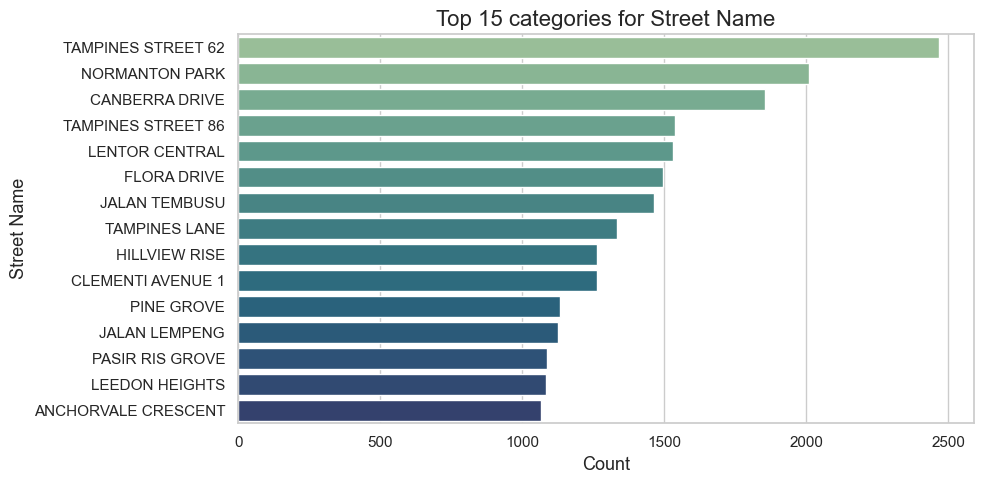

,count
Project Name,
LANDED HOUSING DEVELOPMENT,3339
NORMANTON PARK,2010
TREASURE AT TAMPINES,1332
PARKTOWN RESIDENCE,1095
THE FLORENCE RESIDENCES,885
SPRINGLEAF RESIDENCE,878
GRAND DUNMAN,865
EMERALD OF KATONG,842
PARC CLEMATIS,838


/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/3092198704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


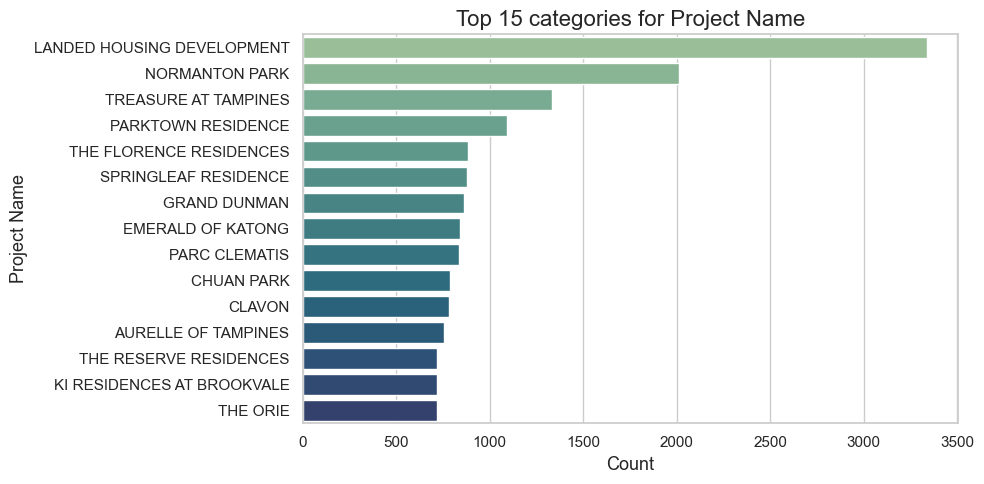

In [25]:
categorical_focus = [
    "Property Type",
    "Type of Sale",
    "Type of Area",
    "Tenure",
    "Market Segment",
    "Floor Level",
    "Street Name",
    "Project Name",
]

for column in categorical_focus:
    if column not in cleaned_df.columns:
        continue
    value_counts = cleaned_df[column].value_counts(dropna=False).head(15)
    display(value_counts.to_frame(name="count"))

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=value_counts.values,
        y=value_counts.index.astype(str),
        orient="h",
        palette="crest"
)
    plt.title(f"Top {len(value_counts)} categories for {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.tight_layout()
    filename = column.lower().replace(" ", "_")
    plt.savefig(PLOTS_DIR / f"categorical_{filename}.png", dpi=300)
    plt.show()

## 10. Bivariate Numeric Relationships
Explore numeric relationships with scatter matrices and correlation statistics to surface trends.

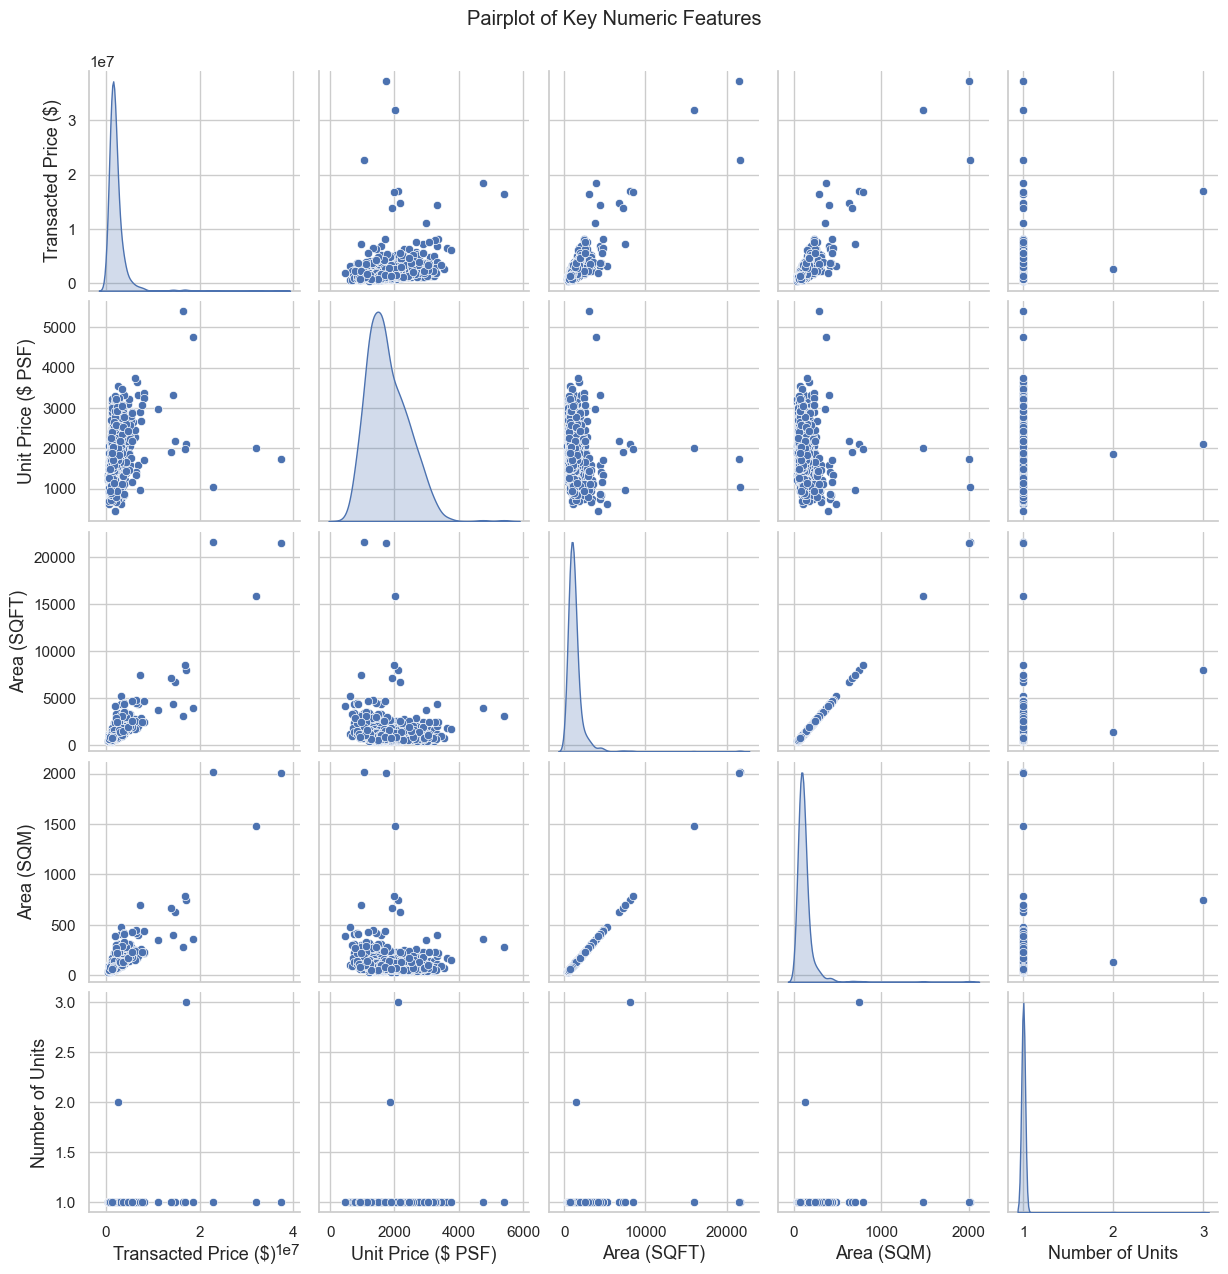

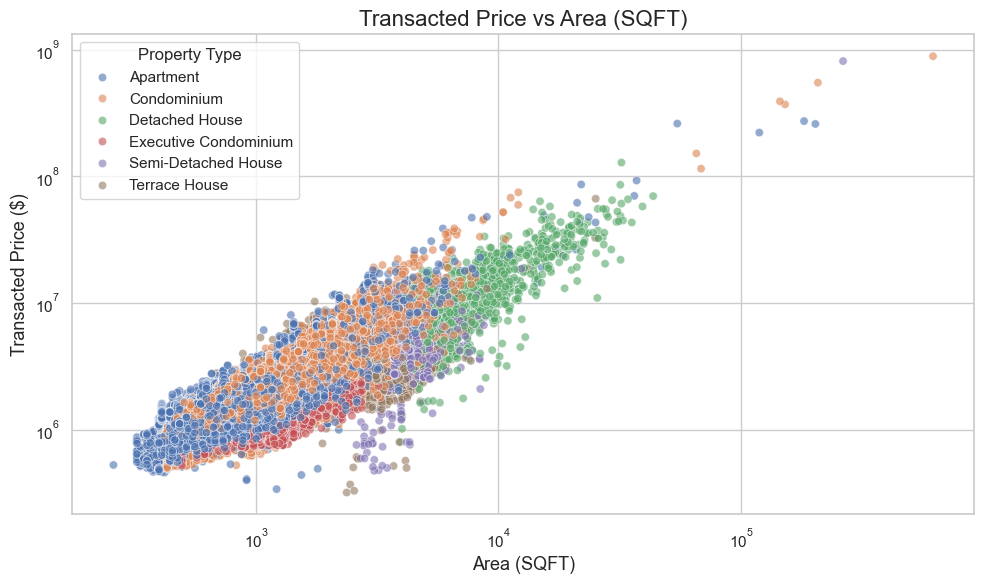

In [26]:
numeric_focus = [
    col for col in [
        "Transacted Price ($)",
        "Unit Price ($ PSF)",
        "Area (SQFT)",
        "Area (SQM)",
        "Number of Units",
] if col in cleaned_df.columns
]

pairplot_sample = cleaned_df[numeric_focus].dropna()
if len(pairplot_sample) > 800:
    pairplot_sample = pairplot_sample.sample(800, random_state=42)

sns.pairplot(pairplot_sample, diag_kind="kde")
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.savefig(PLOTS_DIR / "pairplot_numeric.png", dpi=300)
plt.show()

scatter_columns = ["Area (SQFT)", "Transacted Price ($)"]
if all(col in cleaned_df.columns for col in scatter_columns):
    scatter_data = cleaned_df[scatter_columns + (["Property Type"] if "Property Type" in cleaned_df.columns else [])].dropna()
    scatter_data = scatter_data[(scatter_data["Area (SQFT)"] > 0) & (scatter_data["Transacted Price ($)"] > 0)]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=scatter_data,
        x="Area (SQFT)",
        y="Transacted Price ($)",
        hue="Property Type" if "Property Type" in scatter_data.columns else None,
        alpha=0.6
)
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Transacted Price vs Area (SQFT)")
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / "scatter_price_vs_area.png", dpi=300)
    plt.show()

## 11. Categorical vs Numeric Relationship Exploration
Compare numeric metrics across categorical buckets via groupby summaries and distribution plots.

/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/2154004042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)[value_columns]


Transacted Price ($)                             \
                                     count       median          mean   
Property Type                                                           
Detached House                        1403 9,666,666.00 12,600,938.45   
Semi-Detached House                   3500 4,850,000.00  5,540,743.28   
Terrace House                         6675 3,400,000.00  3,535,802.88   
Condominium                          56809 1,628,000.00  1,996,255.33   
Apartment                            53728 1,609,804.00  1,868,401.97   
Executive Condominium                17202 1,350,000.00  1,375,530.67   

                      Unit Price ($ PSF)                   Area (SQFT)  \
                                   count   median     mean       count   
Property Type                                                            
Detached House                      1403 1,472.00 1,542.27        1403   
Semi-Detached House                 3500 1,402.50 1,519.21        3500   
Terrace House                       6675 1,584.00 1,642.84        6675   
Condominium                        56809 1,629.00 1,725.16       56809   
Apartment                          53728 1,958.00 2,011.66       53728   
Executive Condominium              17202 1,257.00 1,261.16       17202   

                                         
                        median     mean  
Property Type                            
Detached House        6,237.74 8,008.93  
Semi-Detached House   3,529.52 3,700.31  
Terrace House         2,066.69 2,328.07  
Condominium           1,033.34 1,161.10  
Apartment               818.06   941.01  
Executive Condominium 1,065.64 1,108.17

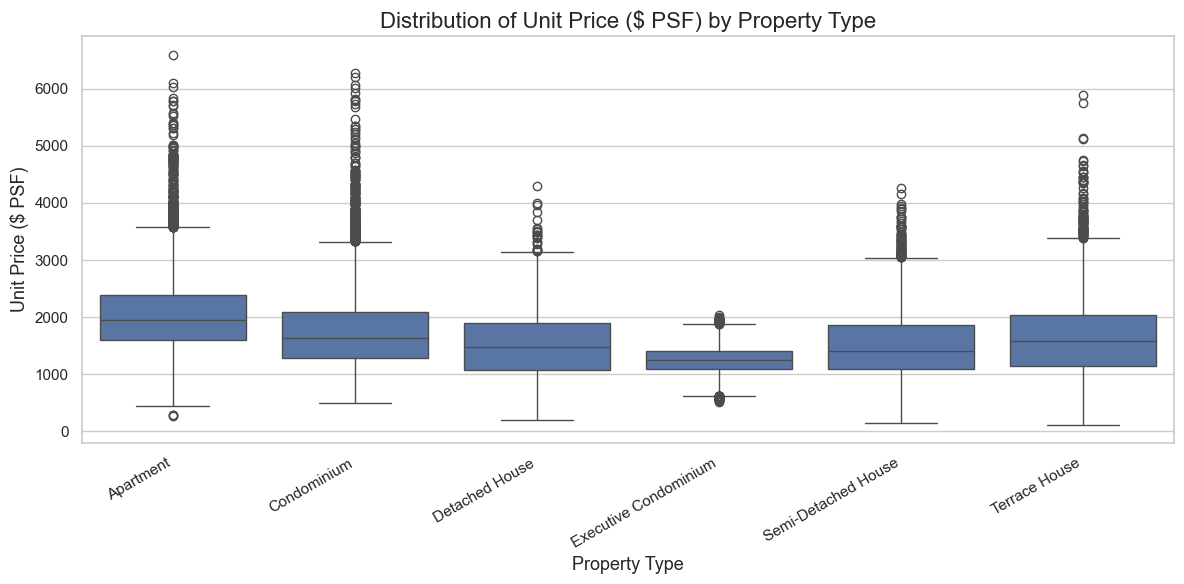

/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/2154004042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)[value_columns]


Transacted Price ($)                            \
                            count       median         mean   
Type of Sale                                                  
New Sale                    49585 1,760,000.00 2,053,378.13   
Resale                      85170 1,530,000.00 2,219,054.18   
Sub Sale                     4562 1,430,000.00 1,602,860.96   

             Unit Price ($ PSF)                   Area (SQFT)           \
                          count   median     mean       count   median   
Type of Sale                                                             
New Sale                  49585 2,188.00 2,177.51       49585   893.41   
Resale                    85170 1,444.00 1,518.93       85170 1,140.98   
Sub Sale                   4562 1,902.00 1,948.65        4562   721.19   

                       
                 mean  
Type of Sale           
New Sale       950.54  
Resale       1,461.28  
Sub Sale       815.49

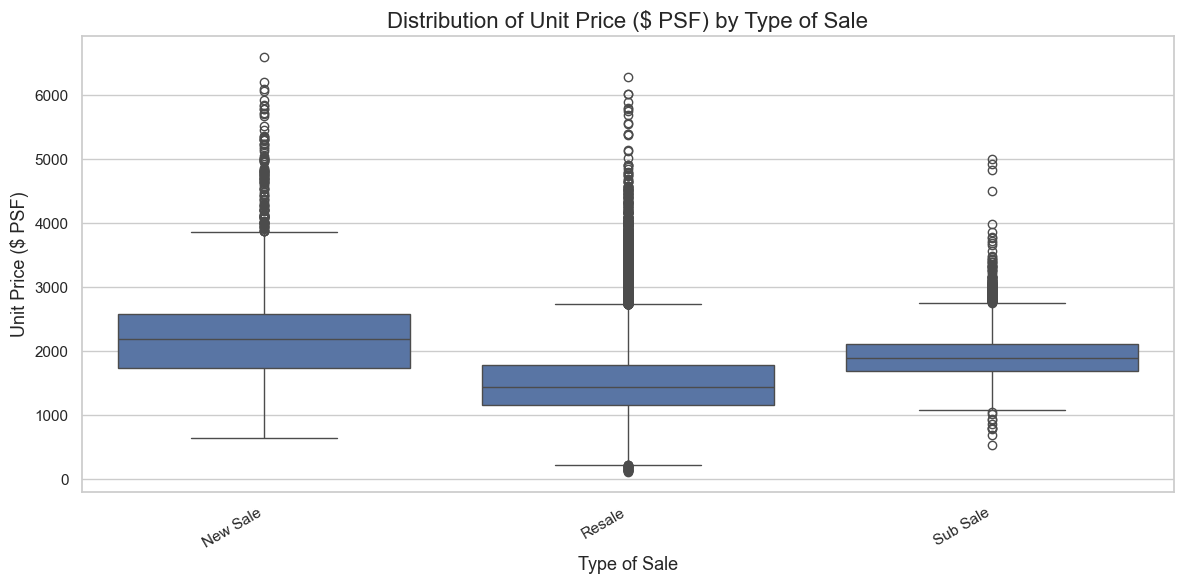

/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/2154004042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)[value_columns]


Transacted Price ($)                            \
                                      count       median         mean   
Market Segment                                                          
Core Central Region                   21142 2,432,000.00 3,572,314.43   
Rest of Central Region                40682 1,780,000.00 2,152,560.64   
Outside Central Region                77493 1,438,000.00 1,742,473.61   

                       Unit Price ($ PSF)                   Area (SQFT)  \
                                    count   median     mean       count   
Market Segment                                                            
Core Central Region                 21142 2,354.00 2,378.22       21142   
Rest of Central Region              40682 1,945.00 2,002.00       40682   
Outside Central Region              77493 1,412.00 1,477.59       77493   

                                          
                         median     mean  
Market Segment                            
Core Central Region    1,065.64 1,584.18  
Rest of Central Region   936.47 1,118.03  
Outside Central Region 1,044.11 1,243.13

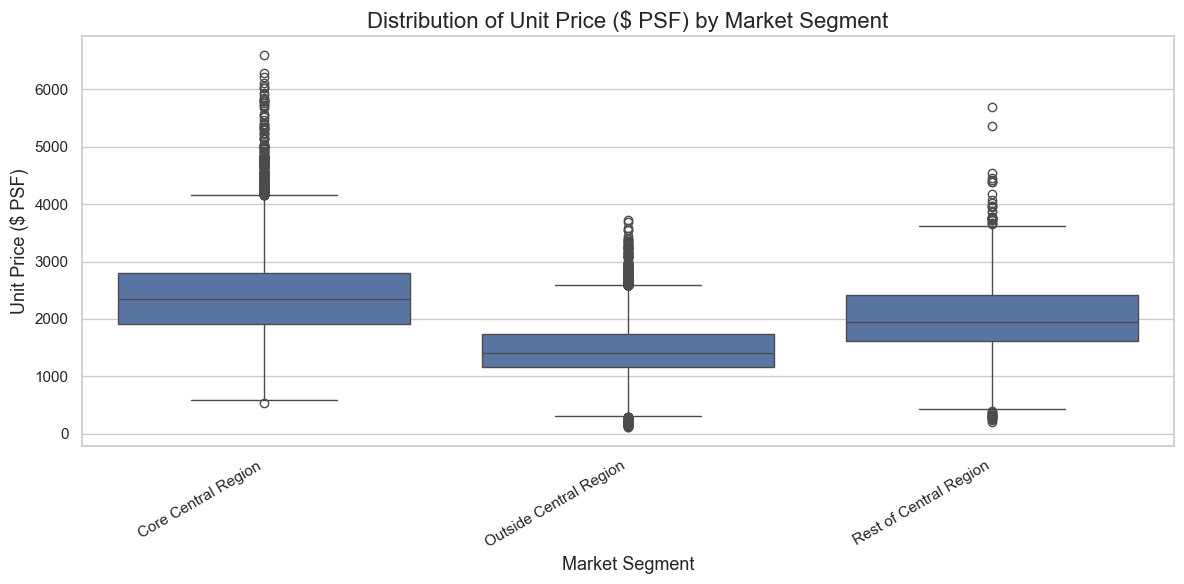

/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/2154004042.py:27: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


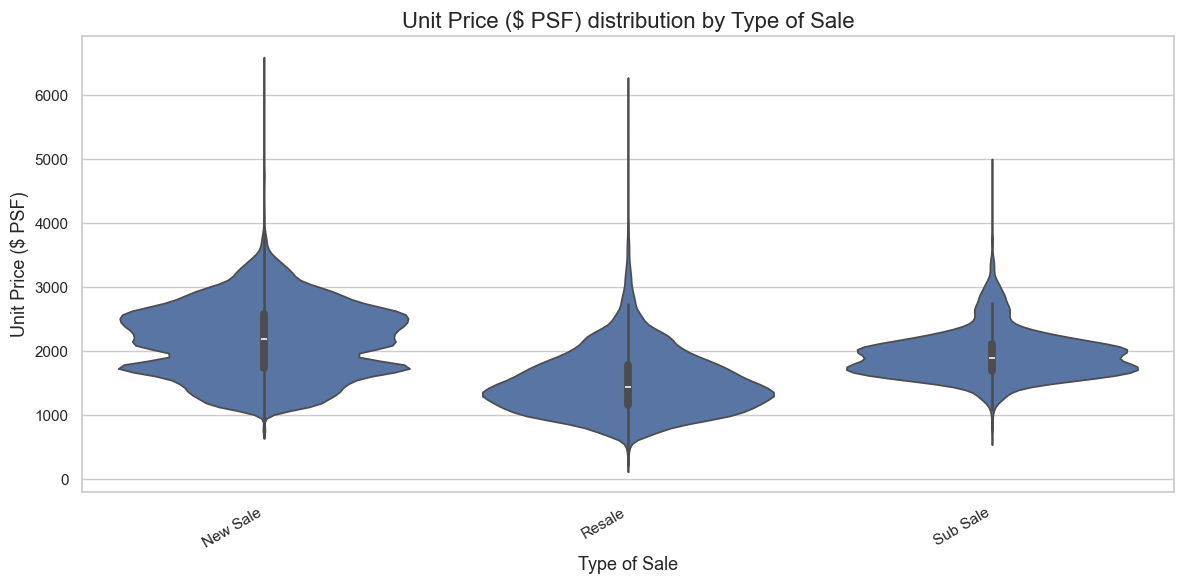

In [28]:
grouping_targets = ["Property Type", "Type of Sale", "Tenure", "Market Segment"]
value_columns = [col for col in ["Transacted Price ($)", "Unit Price ($ PSF)", "Area (SQFT)"] if col in cleaned_df.columns]

for group_col in grouping_targets:
    if group_col not in cleaned_df.columns or group_col == "Tenure":
        continue
    summary = (
        cleaned_df.dropna(subset=value_columns)
        .groupby(group_col)[value_columns]
        .agg(['count', 'median', 'mean'])
        .sort_values((value_columns[0], 'median'), ascending=False)
    )
    display(summary.head(10))

    melted = cleaned_df[[group_col] + value_columns].dropna()
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted, x=group_col, y=value_columns[1] if len(value_columns) > 1 else value_columns[0])
    plt.title(f"Distribution of {value_columns[1] if len(value_columns) > 1 else value_columns[0]} by {group_col}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    filename = group_col.lower().replace(" ", "_")
    plt.savefig(PLOTS_DIR / f"boxplot_{filename}.png", dpi=300)
    plt.show()

if "Type of Sale" in cleaned_df.columns and "Unit Price ($ PSF)" in cleaned_df.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=cleaned_df.dropna(subset=["Type of Sale", "Unit Price ($ PSF)"]),
        x="Type of Sale",
        y="Unit Price ($ PSF)",
        scale="width",
        cut=0
)
    plt.title("Unit Price ($ PSF) distribution by Type of Sale")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / "violin_unit_price_by_sale_type.png", dpi=300)
    plt.show()

## 12. Correlation Heatmap and Multicollinearity Checks
Measure linear and rank correlations across numerics and compute VIF where feasible.

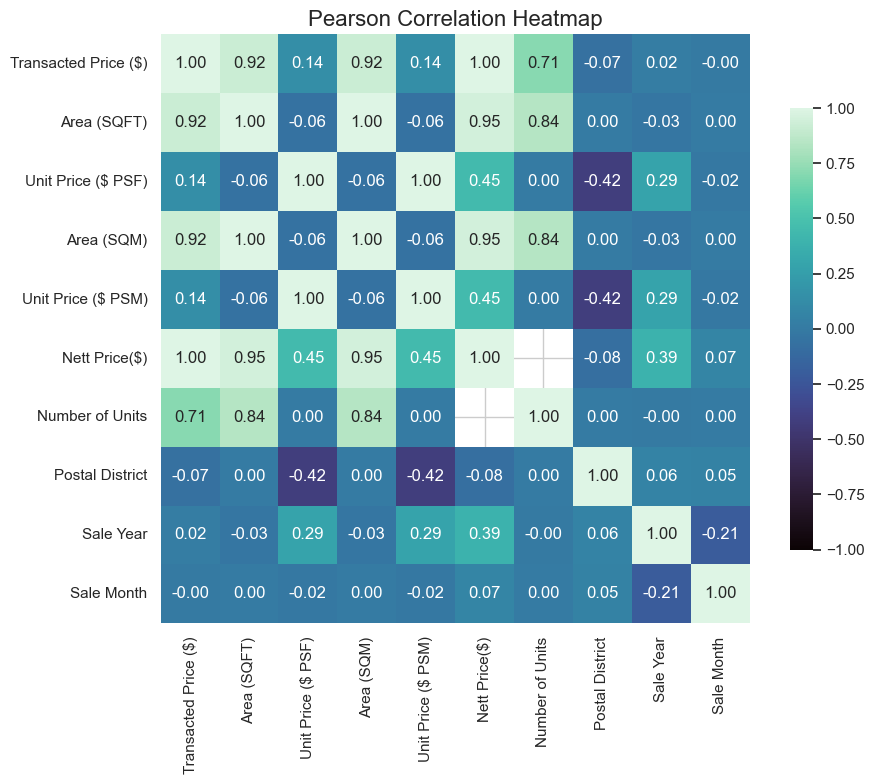

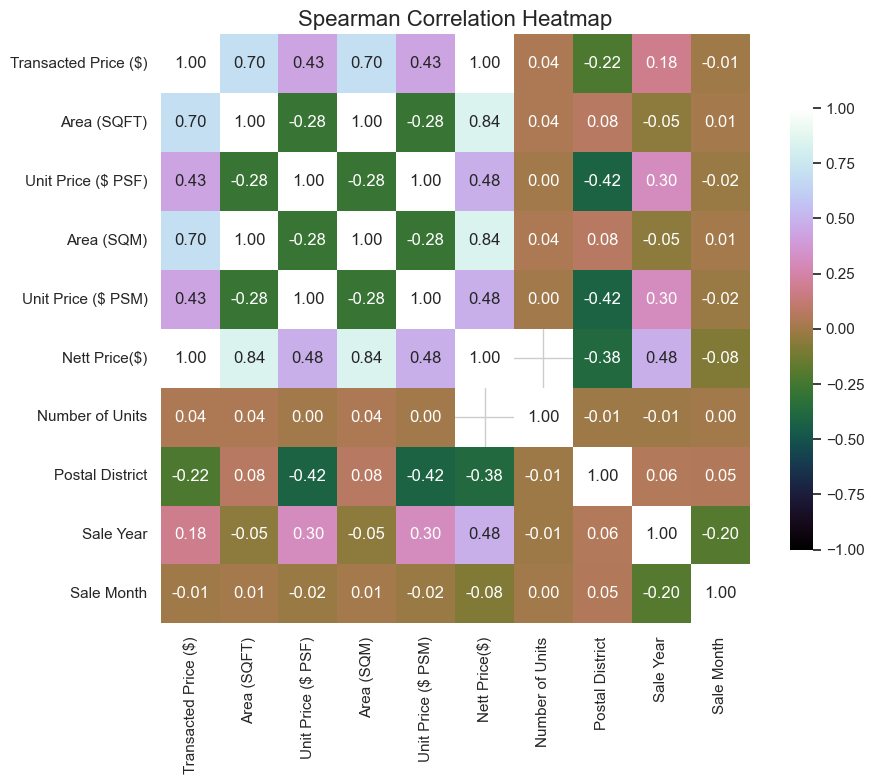

statsmodels not available; skipping VIF calculation.


In [29]:
pearson_corr = numeric_df.corr(method="pearson")
spearman_corr = numeric_df.corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(
    pearson_corr,
    cmap="mako",
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "heatmap_pearson.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr,
    cmap="cubehelix",
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "heatmap_spearman.png", dpi=300)
plt.show()

try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
except ImportError:
    variance_inflation_factor = None

if variance_inflation_factor is None:
    print("statsmodels not available; skipping VIF calculation.")
else:
    vif_data = numeric_df.dropna()
    if vif_data.shape[1] < 2:
        print("Not enough numeric features to compute VIF.")
    else:
        if len(vif_data) > 2000:
            vif_data = vif_data.sample(2000, random_state=42)
        vif_matrix = np.column_stack([vif_data[col].to_numpy() for col in vif_data.columns])
        vif_frame = pd.DataFrame({
            "feature": vif_data.columns,
            "VIF": [variance_inflation_factor(vif_matrix, i) for i in range(vif_matrix.shape[1])]
        })
        display(vif_frame.sort_values("VIF", ascending=False))

## 13. Outlier Detection with Boxplots
Spot extreme values using IQR rules and targeted visualisations.

,feature,iqr,lower_bound,upper_bound,outlier_count,outlier_ratio
5,Nett Price($),"1,058,268.00","-315,370.00","3,917,702.00",21,0.09
1,Area (SQFT),592.02,-156.08,"2,212.00",10919,0.08
3,Area (SQM),55.00,-14.50,205.50,10919,0.08
0,Transacted Price ($),"1,091,112.00","-407,780.00","3,956,668.00",10415,0.07
2,Unit Price ($ PSF),863.00,9.50,"3,461.50",861,0.01
4,Unit Price ($ PSM),"9,292.00",97.00,"37,265.00",860,0.01
6,Number of Units,0.00,1.00,1.00,69,0.00
7,Postal District,11.00,-6.50,37.50,0,0.00
8,Sale Year,3.00,"2,016.50","2,028.50",0,0.00
9,Sale Month,5.00,-3.50,16.50,0,0.00


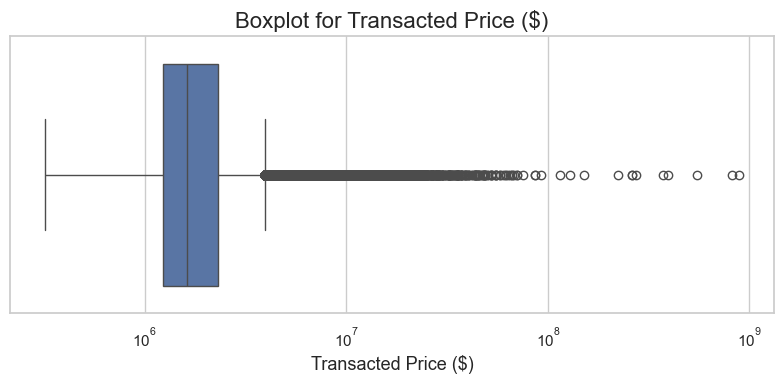

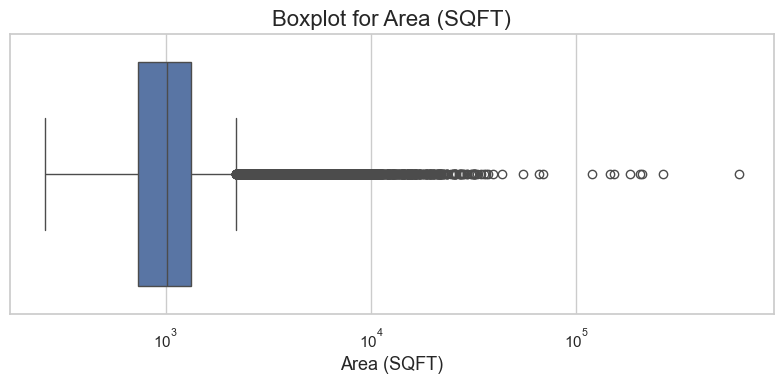

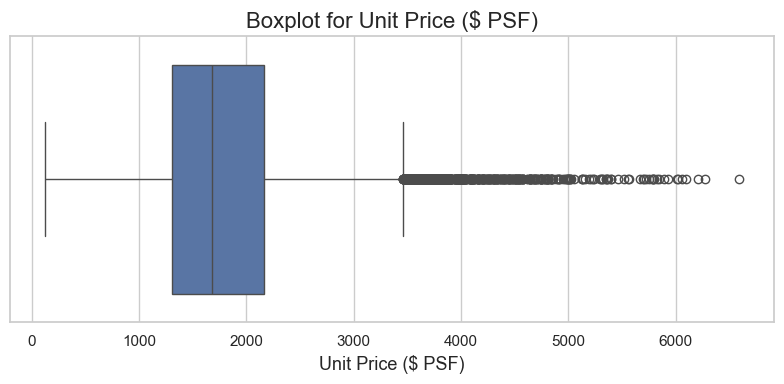

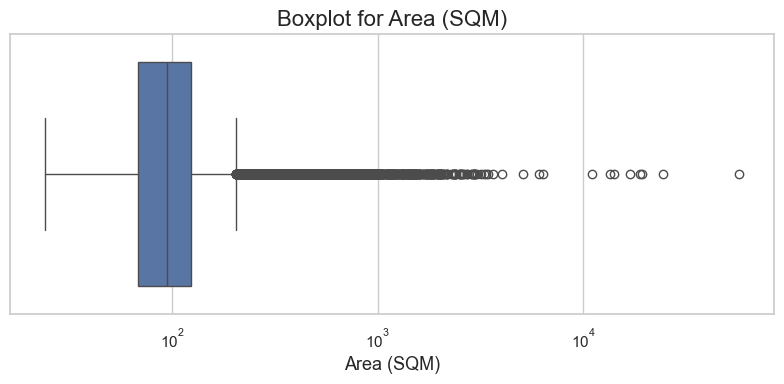

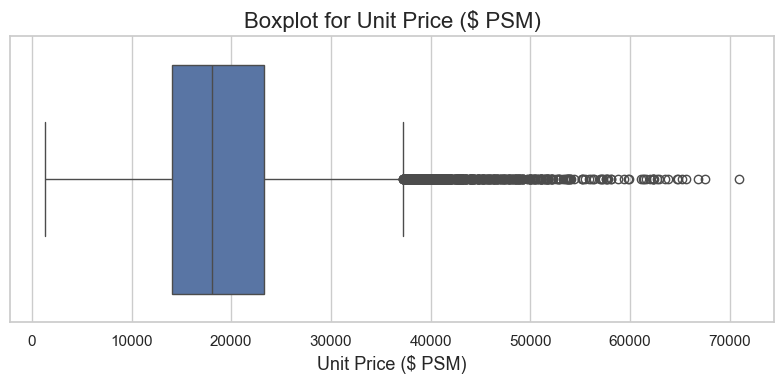

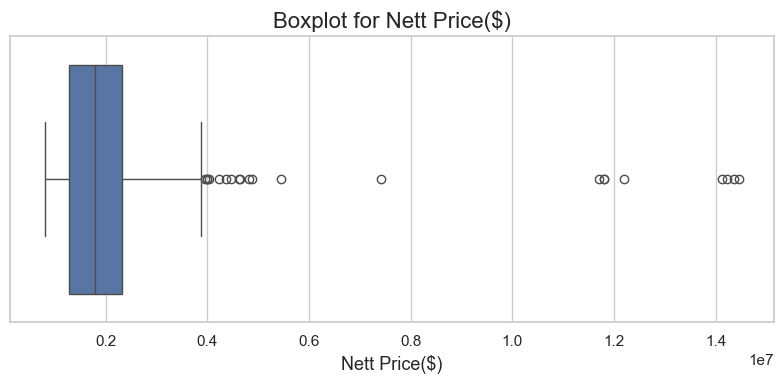

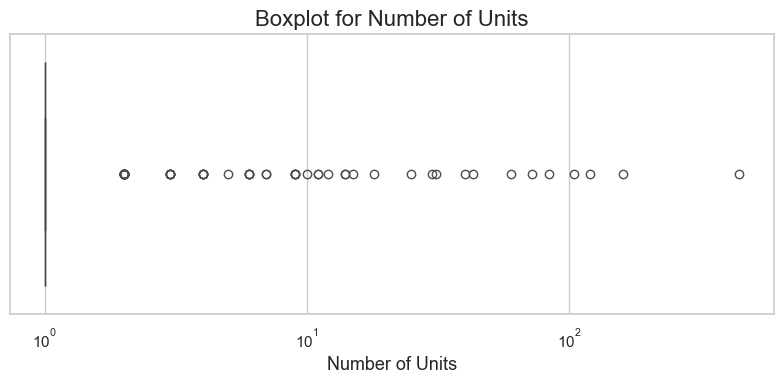

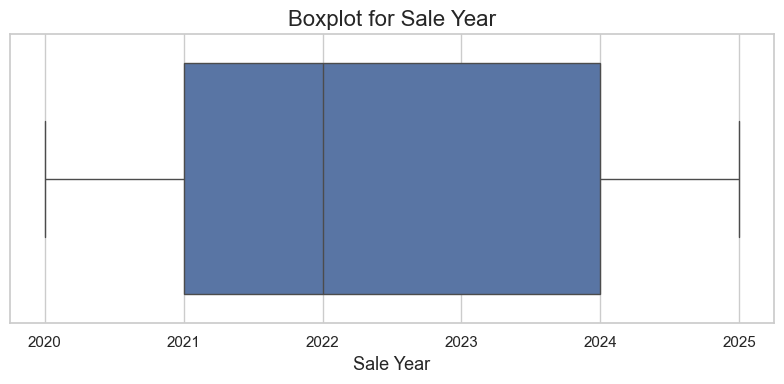

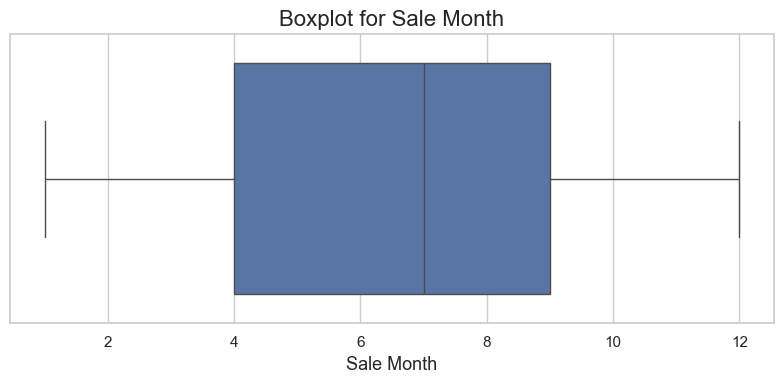

In [31]:
outlier_records = []
for column in numeric_df.columns:
    series = numeric_df[column].dropna()
    if series.empty:
        continue
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = ((series < lower_bound) | (series > upper_bound)).sum()
    outlier_ratio = outlier_count / len(series)
    outlier_records.append({
        "feature": column,
        "iqr": iqr,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outlier_count": outlier_count,
        "outlier_ratio": outlier_ratio,
    })

outlier_summary = pd.DataFrame(outlier_records).sort_values("outlier_ratio", ascending=False)
display(outlier_summary)

for column in numeric_df.columns:
    if column == 'Postal District': continue
    series = numeric_df[column].dropna()
    if series.empty:
        continue
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=series)
    if (series > 0).all() and series.max() / max(series.min(), 1) > 100:
        plt.xscale("log")
    plt.title(f"Boxplot for {column}")
    plt.tight_layout()
    filename = column.lower().replace(" ", "_")
    plt.savefig(PLOTS_DIR / f"boxplot_{filename}.png", dpi=300)
    plt.show()

## 14. Time-Series Feature Exploration
Leverage the parsed sale dates to analyse temporal trends and median pricing trajectories.

/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/384125107.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_metrics = time_df.set_index("Sale Date").resample("M")[value_cols].median()


,Transacted Price ($),Unit Price ($ PSF),Area (SQFT)
Sale Date,,,
2024-10-31,"1,780,000.00","1,938.00","1,001.05"
2024-11-30,"1,929,520.00","2,434.00",947.23
2024-12-31,"1,700,000.00","1,718.00","1,044.11"
2025-01-31,"1,929,000.00","2,262.00",958.00
2025-02-28,"1,817,000.00","2,286.00",925.70
2025-03-31,"1,723,000.00","1,797.00",958.00
2025-04-30,"1,750,000.00","1,902.00",979.52
2025-05-31,"1,760,000.00","1,822.50","1,054.87"
2025-06-30,"1,850,000.00","1,810.00","1,065.64"


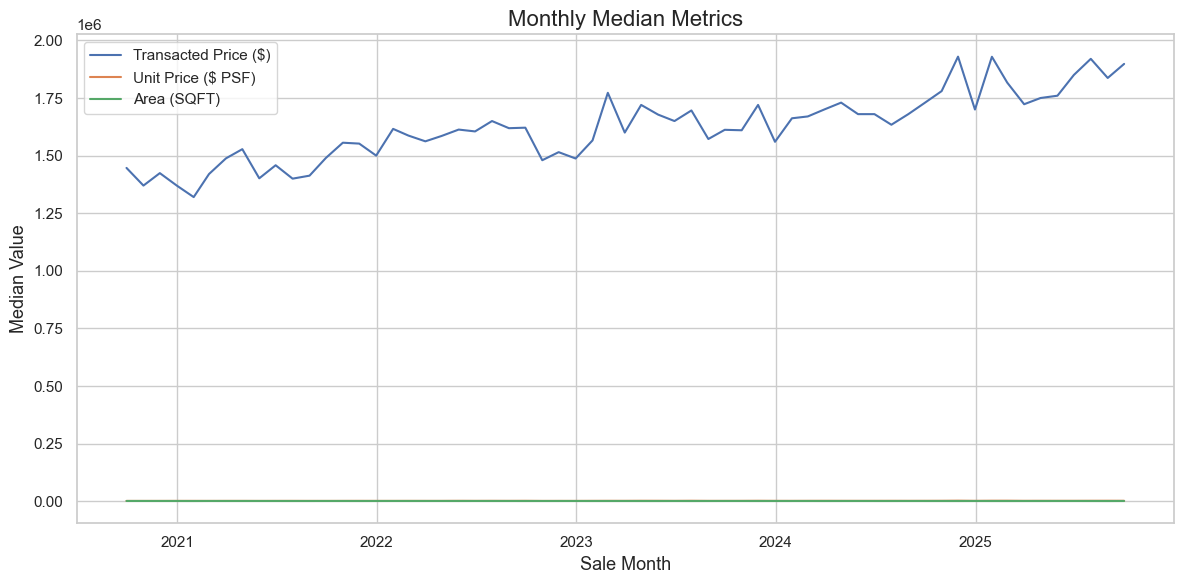

/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/384125107.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Property Type")["Transacted Price ($)"]
/var/folders/nt/67mjll3s4fb1vnp8mvn0q2kh0000gn/T/ipykernel_77054/384125107.py:31: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample("Q")


Property Type,Apartment,Condominium,Executive Condominium,Terrace House
Sale Date,,,,
2023-12-31,"1,667,000.00","1,668,000.00","1,370,000.00","3,590,000.00"
2024-03-31,"1,661,000.00","1,700,000.00","1,483,000.00","3,665,000.00"
2024-06-30,"1,650,000.00","1,720,000.00","1,400,000.00","3,738,000.00"
2024-09-30,"1,618,877.00","1,690,000.00","1,400,000.00","3,780,000.00"
2024-12-31,"1,747,500.00","1,940,000.00","1,484,500.00","3,958,500.00"
2025-03-31,"1,790,000.00","1,874,000.00","1,559,000.00","3,950,000.00"
2025-06-30,"1,700,000.00","1,840,000.00","1,488,000.00","4,000,000.00"
2025-09-30,"1,850,000.00","1,925,000.00","1,666,000.00","4,150,000.00"


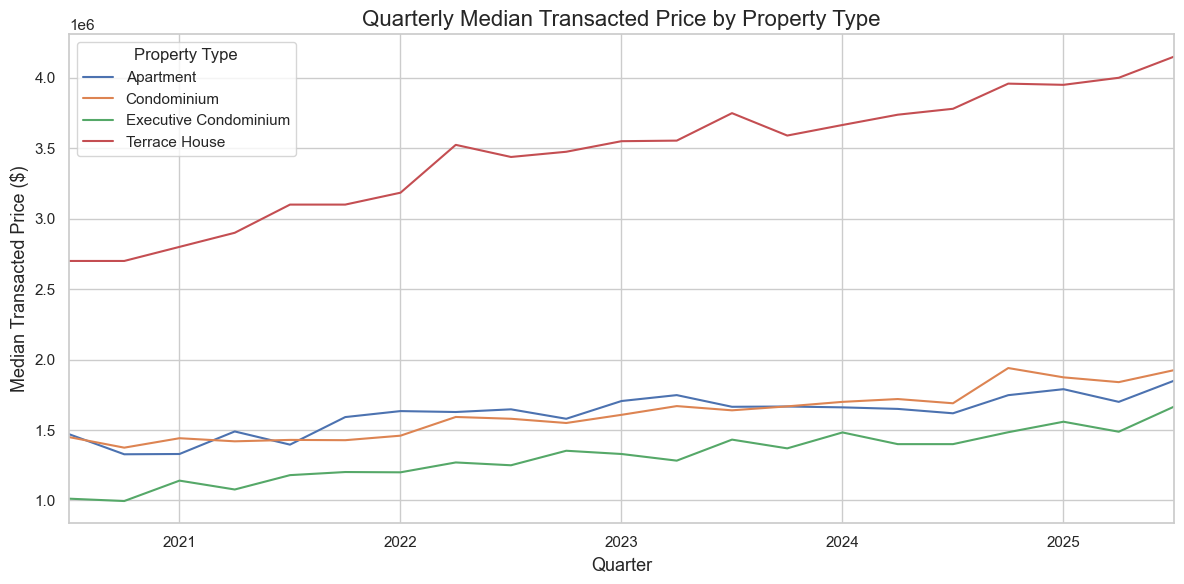

In [32]:
if "Sale Date" not in cleaned_df.columns or cleaned_df["Sale Date"].isna().all():
    print("Sale Date not available after parsing; skipping time-series exploration.")
else:
    time_df = cleaned_df.dropna(subset=["Sale Date"]).copy()
    time_df.sort_values("Sale Date", inplace=True)

    value_cols = [col for col in ["Transacted Price ($)", "Unit Price ($ PSF)", "Area (SQFT)"] if col in time_df.columns]
    if value_cols:
        monthly_metrics = time_df.set_index("Sale Date").resample("M")[value_cols].median()
        display(monthly_metrics.tail(12))

        plt.figure(figsize=(12, 6))
        for column in monthly_metrics.columns:
            plt.plot(monthly_metrics.index, monthly_metrics[column], label=column)
        plt.title("Monthly Median Metrics")
        plt.xlabel("Sale Month")
        plt.ylabel("Median Value")
        plt.legend()
        plt.tight_layout()
        plt.savefig(PLOTS_DIR / "monthly_median_metrics.png", dpi=300)
        plt.show()

    if "Property Type" in time_df.columns and "Transacted Price ($)" in time_df.columns:
        top_properties = time_df["Property Type"].value_counts().head(4).index
        property_subset = time_df[time_df["Property Type"].isin(top_properties)]
        if not property_subset.empty:
            property_trend = (
                property_subset
                .set_index("Sale Date")
                .groupby("Property Type")["Transacted Price ($)"]
                .resample("Q")
                .median()
                .unstack("Property Type")
            )
            display(property_trend.tail(8))

            property_trend.plot(figsize=(12, 6))
            plt.title("Quarterly Median Transacted Price by Property Type")
            plt.xlabel("Quarter")
            plt.ylabel("Median Transacted Price ($)")
            plt.tight_layout()
            plt.savefig(PLOTS_DIR / "quarterly_price_by_property_type.png", dpi=300)
            plt.show()
    else:
        print("Insufficient columns for property type trend analysis.")

## 15. Automated Exploratory Report Generation
Optionally produce a reusable HTML profiling report alongside our manual deep-dive.

In [36]:
from ydata_profiling import ProfileReport

profile_sample = cleaned_df.copy()
if len(profile_sample) > 2500:
    profile_sample = profile_sample.sample(2500, random_state=42)
profile = ProfileReport(profile_sample, title="Private Transactions Profiling Report", minimal=False)
profile_path = OUTPUT_DIR / "private_transactions_profile.html"
profile.to_file(profile_path)
print(f"Profile report saved to: {profile_path.relative_to(REPO_ROOT)}")

/Users/aatmiya/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  81%|████████▏ | 22/27 [00:00<00:00, 117.26it/s, Calculate auto correlation]     /Users/aatmiya/miniconda3/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 7 3 ... 5 9 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/Users/aatmiya/miniconda3/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 6 9 ... 8 0 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 147.92it/s]

Profile report saved to: analysis/outputs/private/private_transactions_profile.html
